In [1]:
!pip install DL_BI


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from DL_BI import dl4n


    import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load Fashion MNIST data
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize images
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

# Reshape to include channel dimension (28x28x1)
x_train_full = x_train_full.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_full_cat = to_categorical(y_train_full, 10)
y_test_cat = to_categorical(y_test, 10)

# Split training into train and validatio

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


C:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.5792 - loss: 1.1177 - val_accuracy: 0.8051 - val_loss: 0.5143
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.7947 - loss: 0.5725 - val_accuracy: 0.8487 - val_loss: 0.4137
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 27ms/step - accuracy: 0.8262 - loss: 0.4867 - val_accuracy: 0.8620 - val_loss: 0.3792
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.8352 - loss: 0.4580 - val_accuracy: 0.8630 - val_loss: 0.3754
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.8425 - loss: 0.4298 - val_accuracy: 0.8709 - val_loss: 0.3405
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


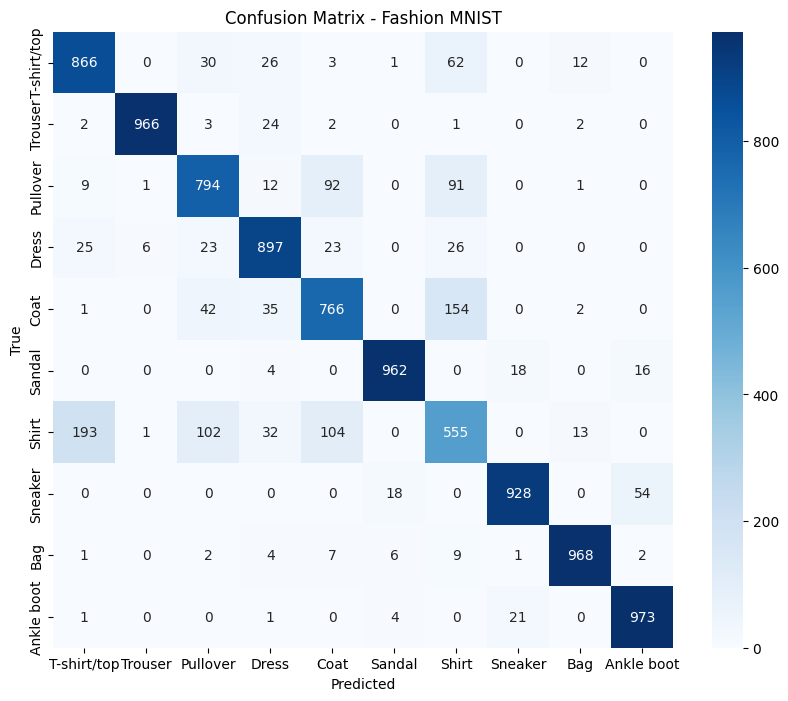

Classification Report:               precision    recall  f1-score   support

 T-shirt/top       0.79      0.87      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.79      0.80      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.77      0.77      0.77      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.62      0.56      0.58      1000
     Sneaker       0.96      0.93      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.93      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load Fashion MNIST data
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize images
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

# Reshape to include channel dimension (28x28x1)
x_train_full = x_train_full.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_full_cat = to_categorical(y_train_full, 10)
y_test_cat = to_categorical(y_test, 10)

# Split training into train and validation (80-20)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full_cat, test_size=0.2, random_state=42)

# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes in Fashion MNIST
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training
early_stop = EarlyStopping(monitor='val_loss', patience=3 )
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val), callbacks=[early_stop])

# Predictions
pred_probs = model.predict(x_test)
y_pred = np.argmax(pred_probs, axis=1)
y_true = y_test
class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Fashion MNIST')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:", report)
